In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [217]:
df = pd.read_csv('../datasets/GPU_benchmarks_v7.csv')
df.head()

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.65,2022,Unknown
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.82,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.41,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.86,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.66,2020,Desktop


In [218]:
df.max()

gpuName             zxcvIntel HD 620
G3Dmark                        29094
G2Dmark                         1117
price                         8999.0
gpuValue                       69.73
TDP                            500.0
powerPerformance               204.0
testDate                        2022
category                 Workstation
dtype: object

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   int64  
 3   price             553 non-null    float64
 4   gpuValue          553 non-null    float64
 5   TDP               692 non-null    float64
 6   powerPerformance  692 non-null    float64
 7   testDate          2317 non-null   int64  
 8   category          2317 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 163.0+ KB


<AxesSubplot:>

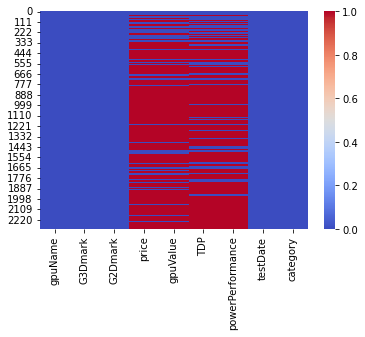

In [220]:
sns.heatmap(df.isnull(),cmap='coolwarm')

# EDA 

In [221]:
df.columns

Index(['gpuName', 'G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP',
       'powerPerformance', 'testDate', 'category'],
      dtype='object')

<AxesSubplot:xlabel='G3Dmark', ylabel='price'>

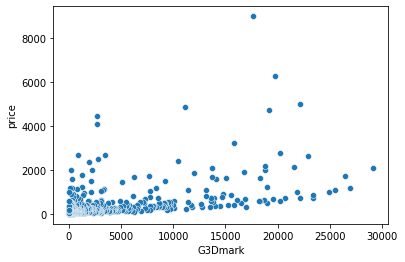

In [222]:
sns.scatterplot(x='G3Dmark', y='price', data=df)

<AxesSubplot:xlabel='G2Dmark', ylabel='price'>

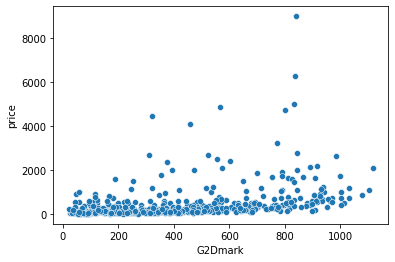

In [223]:
sns.scatterplot(x='G2Dmark', y='price', data=df)

In [224]:
df.testDate.unique()

array([2022, 2021, 2020, 2018, 2019, 2017, 2016, 2015, 2014, 2013, 2012,
       2010, 2011, 2009], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

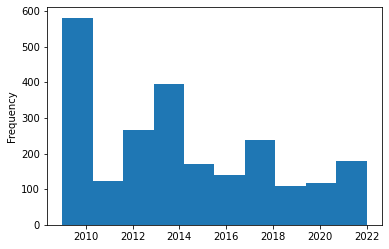

In [225]:
df['testDate'].plot(kind='hist')

# Data Cleaning

### Model for price

In [226]:
df.columns

Index(['gpuName', 'G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP',
       'powerPerformance', 'testDate', 'category'],
      dtype='object')

In [227]:
price_df = df[df['price'].isnull() == False]

In [228]:
price_df.head()

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.65,2022,Unknown
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.82,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.41,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.86,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.66,2020,Desktop


In [229]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 0 to 2298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           553 non-null    object 
 1   G3Dmark           553 non-null    int64  
 2   G2Dmark           553 non-null    int64  
 3   price             553 non-null    float64
 4   gpuValue          553 non-null    float64
 5   TDP               387 non-null    float64
 6   powerPerformance  387 non-null    float64
 7   testDate          553 non-null    int64  
 8   category          553 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 43.2+ KB


In [230]:
df.columns

Index(['gpuName', 'G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP',
       'powerPerformance', 'testDate', 'category'],
      dtype='object')

In [231]:
price_df.drop(['TDP','powerPerformance'], axis=1, inplace=True)

C:\Users\Deepu Singla\AppData\Local\Temp\ipykernel_10728\1292315495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df.drop(['TDP','powerPerformance'], axis=1, inplace=True)


In [232]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 0 to 2298
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gpuName   553 non-null    object 
 1   G3Dmark   553 non-null    int64  
 2   G2Dmark   553 non-null    int64  
 3   price     553 non-null    float64
 4   gpuValue  553 non-null    float64
 5   testDate  553 non-null    int64  
 6   category  553 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ KB


In [233]:
price_X = price_df.drop(['price','gpuValue'], axis=1)
price_y = price_df['price']

In [234]:
from sklearn.ensemble import RandomForestRegressor

In [235]:
price_X = price_X.drop(['gpuName','category'],axis=1)

In [236]:
model_price = RandomForestRegressor()

In [237]:
model_price.fit(price_X, price_y)

RandomForestRegressor()

In [238]:
price_X.columns

Index(['G3Dmark', 'G2Dmark', 'testDate'], dtype='object')

In [239]:
np.array(price_X.iloc[0])

array([29094,  1117,  2022], dtype=int64)

In [240]:
model_price.predict([[2.9094e+04, 1.1170e+03, 2.0220e+03]])

C:\Users\Deepu Singla\PycharmProjects\gpuRecommender\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1736.7726])

In [241]:
price_y.iloc[0]

2099.99

* Filling in the null values

In [242]:
df.columns

Index(['gpuName', 'G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP',
       'powerPerformance', 'testDate', 'category'],
      dtype='object')

In [243]:
price_null = df[df['price'].isnull()==True][['G3Dmark', 'G2Dmark', 'testDate']]

In [244]:
prediction = model_price.predict(price_null)

In [245]:
prediction

array([ 761.2307, 4367.3654,  789.3504, ...,  714.8847,  681.5746,
        715.1126])

In [246]:
df[df['price'].isnull() == True]['price'] = pd.Series(prediction)

C:\Users\Deepu Singla\AppData\Local\Temp\ipykernel_10728\2099280297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['price'].isnull() == True]['price'] = pd.Series(prediction)


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   int64  
 3   price             553 non-null    float64
 4   gpuValue          553 non-null    float64
 5   TDP               692 non-null    float64
 6   powerPerformance  692 non-null    float64
 7   testDate          2317 non-null   int64  
 8   category          2317 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 163.0+ KB


In [248]:
nf = df.copy()

In [249]:
counter = 0
for i in nf[nf['price'].isnull() == True]['price'].index:
    nf.loc[i,'price'] = prediction[counter]
    counter+=1


In [250]:
nf[nf['price'].isnull() == True]['price']
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   int64  
 3   price             2317 non-null   float64
 4   gpuValue          553 non-null    float64
 5   TDP               692 non-null    float64
 6   powerPerformance  692 non-null    float64
 7   testDate          2317 non-null   int64  
 8   category          2317 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 163.0+ KB


In [251]:
nf.iloc[17]

gpuName             TITAN Xp
G3Dmark                19508
G2Dmark                  992
price               761.2307
gpuValue                 NaN
TDP                    250.0
powerPerformance       78.03
testDate                2020
category             Unknown
Name: 17, dtype: object

In [252]:
df = nf

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   int64  
 3   price             2317 non-null   float64
 4   gpuValue          553 non-null    float64
 5   TDP               692 non-null    float64
 6   powerPerformance  692 non-null    float64
 7   testDate          2317 non-null   int64  
 8   category          2317 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 163.0+ KB


### Model for gpuValue

In [254]:
price_df.head()

,gpuName,G3Dmark,G2Dmark,price,gpuValue,testDate,category
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,2022,Unknown
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.99,15.08,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.00,24.88,2020,Desktop


In [255]:
price_df.drop(['category','gpuName'], axis=1, inplace=True)

In [256]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 0 to 2298
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   G3Dmark   553 non-null    int64  
 1   G2Dmark   553 non-null    int64  
 2   price     553 non-null    float64
 3   gpuValue  553 non-null    float64
 4   testDate  553 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 25.9 KB


In [257]:
X = price_df.drop('gpuValue',axis=1)
y = price_df['gpuValue']

In [258]:
model_gpuValue = RandomForestRegressor()

In [259]:
model_gpuValue.fit(X,y)

RandomForestRegressor()

In [260]:
X.columns

Index(['G3Dmark', 'G2Dmark', 'price', 'testDate'], dtype='object')

In [261]:
df[df['gpuValue'].isnull()==True][['G3Dmark', 'G2Dmark', 'price', 'testDate']]

,G3Dmark,G2Dmark,price,testDate
17,19508,992,761.2307,2020
18,19507,780,4367.3654,2022
25,18721,924,789.3504,2017
26,18490,719,3150.5928,2022
31,16988,1086,605.4469,2018
...,...,...,...,...
2312,1,107,722.5234,2010
2313,1,143,681.5746,2009
2314,1,40,714.8847,2009
2315,1,142,681.5746,2009


In [262]:
prediction = model_gpuValue.predict(df[df['gpuValue'].isnull()==True][['G3Dmark', 'G2Dmark', 'price', 'testDate']])

In [263]:
prediction

array([2.83368e+01, 4.54830e+00, 2.60006e+01, ..., 1.04000e-02,
       9.60000e-03, 1.04000e-02])

In [264]:
counter = 0
for i in df[df['gpuValue'].isnull() == True]['gpuValue'].index:
    df.loc[i,'gpuValue'] = prediction[counter]
    counter+=1

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   int64  
 3   price             2317 non-null   float64
 4   gpuValue          2317 non-null   float64
 5   TDP               692 non-null    float64
 6   powerPerformance  692 non-null    float64
 7   testDate          2317 non-null   int64  
 8   category          2317 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 163.0+ KB


### Model for filling of TDP

In [266]:
data3 = df[df['TDP'].isnull() == False]

In [267]:
data3.head()

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.65,2022,Unknown
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.82,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.41,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.86,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.66,2020,Desktop


In [268]:
data3.columns

Index(['gpuName', 'G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP',
       'powerPerformance', 'testDate', 'category'],
      dtype='object')

In [269]:
data3 = data3[['G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP', 'powerPerformance', 'testDate']]

In [270]:
data3.head()

,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate
0,29094,1117,2099.99,13.85,450.0,64.65,2022
1,26887,1031,1199.99,22.41,350.0,76.82,2021
2,26395,999,1749.99,15.08,350.0,75.41,2020
3,25458,1102,1120.31,22.72,300.0,84.86,2020
4,24853,1003,999.00,24.88,320.0,77.66,2020


In [271]:
X = data3.drop(['TDP','powerPerformance'], axis=1)
y = data3['TDP']

In [272]:
model_tdp = RandomForestRegressor()

In [273]:
model_tdp.fit(X,y)

RandomForestRegressor()

In [274]:
data3.columns

Index(['G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP', 'powerPerformance',
       'testDate'],
      dtype='object')

In [275]:
X.columns

Index(['G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'testDate'], dtype='object')

In [276]:
df[df['TDP'].isnull()==True][['G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'testDate']]

,G3Dmark,G2Dmark,price,gpuValue,testDate
42,16235,406,2190.5462,6.2404,2019
45,15910,604,1955.0641,7.2379,2022
46,15899,823,1626.4178,9.4725,2022
55,14738,827,1362.9400,9.4995,2020
58,14630,948,788.3797,19.4020,2021
...,...,...,...,...,...
2312,1,107,722.5234,0.0092,2010
2313,1,143,681.5746,0.0096,2009
2314,1,40,714.8847,0.0104,2009
2315,1,142,681.5746,0.0096,2009


In [277]:
predictions = model_tdp.predict(df[df['TDP'].isnull()==True][['G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'testDate']])

In [278]:
len(predictions)

1625

In [279]:
counter = 0
for i in df[df['TDP'].isnull() == True]['TDP'].index:
    df.loc[i,'TDP'] = predictions[counter]
    counter+=1

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   int64  
 3   price             2317 non-null   float64
 4   gpuValue          2317 non-null   float64
 5   TDP               2317 non-null   float64
 6   powerPerformance  692 non-null    float64
 7   testDate          2317 non-null   int64  
 8   category          2317 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 163.0+ KB


### Model for powerPerformance

In [281]:
data4 = df[df['powerPerformance'].isnull() == False]

In [282]:
data4.head()

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.65,2022,Unknown
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.82,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.41,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.86,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.66,2020,Desktop


In [283]:
data4.drop(['gpuName','category'],axis=1,inplace=True)

C:\Users\Deepu Singla\AppData\Local\Temp\ipykernel_10728\3081667492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.drop(['gpuName','category'],axis=1,inplace=True)


In [284]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 2068
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   G3Dmark           692 non-null    int64  
 1   G2Dmark           692 non-null    int64  
 2   price             692 non-null    float64
 3   gpuValue          692 non-null    float64
 4   TDP               692 non-null    float64
 5   powerPerformance  692 non-null    float64
 6   testDate          692 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 43.2 KB


In [285]:
X = data4.drop('powerPerformance',axis=1)
Y = data4['powerPerformance']

In [286]:
X.head()

,G3Dmark,G2Dmark,price,gpuValue,TDP,testDate
0,29094,1117,2099.99,13.85,450.0,2022
1,26887,1031,1199.99,22.41,350.0,2021
2,26395,999,1749.99,15.08,350.0,2020
3,25458,1102,1120.31,22.72,300.0,2020
4,24853,1003,999.00,24.88,320.0,2020


In [287]:
Y.head()

0    64.65
1    76.82
2    75.41
3    84.86
4    77.66
Name: powerPerformance, dtype: float64

In [288]:
model_power = RandomForestRegressor()

In [289]:
model_power.fit(X,Y)

RandomForestRegressor()

In [290]:
predictions = model_power.predict(df[df['powerPerformance'].isnull()==True][['G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP','testDate']])

In [291]:
len(predictions)

1625

In [292]:
counter = 0
for i in df[df['powerPerformance'].isnull() == True]['powerPerformance'].index:
    df.loc[i,'powerPerformance'] = predictions[counter]
    counter+=1

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   int64  
 3   price             2317 non-null   float64
 4   gpuValue          2317 non-null   float64
 5   TDP               2317 non-null   float64
 6   powerPerformance  2317 non-null   float64
 7   testDate          2317 non-null   int64  
 8   category          2317 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 163.0+ KB


### Handling category column

In [294]:
dum = pd.get_dummies(df['category'])

In [295]:
df.head()

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.65,2022,Unknown
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.82,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.41,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.86,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.66,2020,Desktop


In [297]:
df = df.join(dum)


In [298]:
df.drop('category',axis=1,inplace=True)

# Final Model

In [299]:
df.head()

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,Desktop,"Desktop, Mobile",Mobile,"Mobile, Workstation",Unknown,Workstation
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.65,2022,0,0,0,0,1,0
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.82,2021,1,0,0,0,0,0
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.41,2020,1,0,0,0,0,0
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.86,2020,1,0,0,0,0,0
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.66,2020,1,0,0,0,0,0


In [300]:
df.columns

Index(['gpuName', 'G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP',
       'powerPerformance', 'testDate', 'Desktop', 'Desktop, Mobile', 'Mobile',
       'Mobile, Workstation', 'Unknown', 'Workstation'],
      dtype='object')

In [301]:
len(df['gpuName'].unique())

2317

In [302]:
X = df.drop('gpuName',axis=1)
# X = df.drop(['gpuName','testDate','gpuValue'],axis=1)
y = np.arange(2317)

In [303]:
X = np.array(X)

In [304]:
df.iloc[0]

gpuName                GeForce RTX 3090 Ti
G3Dmark                              29094
G2Dmark                               1117
price                              2099.99
gpuValue                             13.85
TDP                                  450.0
powerPerformance                     64.65
testDate                              2022
Desktop                                  0
Desktop, Mobile                          0
Mobile                                   0
Mobile, Workstation                      0
Unknown                                  1
Workstation                              0
Name: 0, dtype: object

In [305]:
X[0]

array([2.90940e+04, 1.11700e+03, 2.09999e+03, 1.38500e+01, 4.50000e+02,
       6.46500e+01, 2.02200e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00])

In [306]:
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [307]:
X.shape, y.shape

((2317, 13), (2317,))

In [308]:
tf.random.set_seed(42)

gpu_model_1 = tf.keras.Sequential() #to add nuron
gpu_model_1.add(tf.keras.layers.Flatten()) #convert 2d into 1d
gpu_model_1.add(tf.keras.layers.Dense(43, activation='relu')) #make lines
#checking lines
gpu_model_1.add(tf.keras.layers.Dense(57, activation='relu'))
gpu_model_1.add(tf.keras.layers.Dense(43, activation='relu'))
gpu_model_1.add(tf.keras.layers.Dense(57, activation='relu'))
gpu_model_1.add(tf.keras.layers.Dense(43, activation='relu'))
gpu_model_1.add(tf.keras.layers.Dense(43, activation='relu'))
gpu_model_1.add(tf.keras.layers.Dense(2317, activation='softmax'))
#how to check
gpu_model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.0009),#learning rate
    metrics = ['accuracy']
)

gpu_model_1.fit(X, y, epochs=200)


73/73 [==============================] - 0s 6ms/step - loss: 4.8375 - accuracy: 0.0255
Epoch 10/200
73/73 [==============================] - 0s 5ms/step - loss: 4.5993 - accuracy: 0.0315
Epoch 11/200
73/73 [==============================] - 0s 6ms/step - loss: 4.3569 - accuracy: 0.0492
Epoch 12/200
73/73 [==============================] - 0s 6ms/step - loss: 4.2427 - accuracy: 0.0505
Epoch 13/200
73/73 [==============================] - 1s 7ms/step - loss: 3.9641 - accuracy: 0.0742
Epoch 14/200
73/73 [==============================] - 0s 6ms/step - loss: 3.8724 - accuracy: 0.0798
Epoch 15/200
73/73 [==============================] - 0s 5ms/step - loss: 3.6804 - accuracy: 0.0842
Epoch 16/200
73/73 [==============================] - 0s 4ms/step - loss: 3.5555 - accuracy: 0.0941
Epoch 17/200
73/73 [==============================] - 0s 5ms/step - loss: 3.4386 - accuracy: 0.1101
Epoch 18/200
73/73 [==============================] - 1s 7ms/step - loss: 3.3857 - accuracy: 0.1114
Epoch 19/200


Epoch 1/200
73/73 [==============================] - 2s 7ms/step - loss: 10.0954 - accuracy: 0.0000e+00
Epoch 2/200
73/73 [==============================] - 0s 6ms/step - loss: 7.6762 - accuracy: 8.6319e-04
Epoch 3/200
73/73 [==============================] - 0s 6ms/step - loss: 7.3565 - accuracy: 0.0013
Epoch 4/200
73/73 [==============================] - 0s 6ms/step - loss: 6.8649 - accuracy: 0.0030
Epoch 5/200
73/73 [==============================] - 0s 6ms/step - loss: 6.3721 - accuracy: 0.0056
Epoch 6/200
73/73 [==============================] - 1s 7ms/step - loss: 5.7863 - accuracy: 0.0091
Epoch 7/200
73/73 [==============================] - 0s 6ms/step - loss: 5.3825 - accuracy: 0.0147
Epoch 8/200
73/73 [==============================] - 0s 6ms/step - loss: 4.9885 - accuracy: 0.0211
Epoch 9/200
73/73 [==============================] - 0s 6ms/step - loss: 4.7117 - accuracy: 0.0242
Epoch 10/200
73/73 [==============================] - 0s 6ms/step - loss: 4.4675 - accuracy: 0.0298


In [309]:
prob = gpu_model_1.predict(X)
predict = prob.argmax(axis=1)

In [310]:
from keras.models import load_model
gpu_model_1.save('model.h5')

In [311]:
df['gpuName']

0                       GeForce RTX 3090 Ti
1                       GeForce RTX 3080 Ti
2                          GeForce RTX 3090
3                         Radeon RX 6900 XT
4                          GeForce RTX 3080
                       ...                 
2312    Intel 82852/82855 GM/GME Controller
2313                            Quadro2 Pro
2314                           Rage 128 Pro
2315               RAGE 128 PRO AGP 4X TMDS
2316                        S3 ProSavageDDR
Name: gpuName, Length: 2317, dtype: object

0                       GeForce RTX 3090 Ti
1                       GeForce RTX 3080 Ti
2                          GeForce RTX 3090
3                         Radeon RX 6900 XT
4                          GeForce RTX 3080
                       ...                 
2312    Intel 82852/82855 GM/GME Controller
2313                            Quadro2 Pro
2314                           Rage 128 Pro
2315               RAGE 128 PRO AGP 4X TMDS
2316                        S3 ProSavageDDR
Name: gpuName, Length: 2317, dtype: object

In [312]:
df['gpuName'].iloc[predict]

0                       GeForce RTX 3090 Ti
1                       GeForce RTX 3080 Ti
0                       GeForce RTX 3090 Ti
3                         Radeon RX 6900 XT
3                         Radeon RX 6900 XT
                       ...                 
2312    Intel 82852/82855 GM/GME Controller
2315               RAGE 128 PRO AGP 4X TMDS
2311                               IGP 340M
2315               RAGE 128 PRO AGP 4X TMDS
2311                               IGP 340M
Name: gpuName, Length: 2317, dtype: object

0                          GeForce RTX 3090 Ti
1                          GeForce RTX 3080 Ti
0                          GeForce RTX 3090 Ti
1                          GeForce RTX 3080 Ti
1                          GeForce RTX 3080 Ti
                         ...                  
2307    VIA Chrome9 HC IGP Prerelease WDDM 1.1
2315                  RAGE 128 PRO AGP 4X TMDS
2311                                  IGP 340M
2315                  RAGE 128 PRO AGP 4X TMDS
2311                                  IGP 340M
Name: gpuName, Length: 2317, dtype: object

In [313]:
predict

array([   0,    1,    0, ..., 2311, 2315, 2311], dtype=int64)

array([   0,    1,    0, ..., 2311, 2315, 2311], dtype=int64)

In [314]:
from sklearn.metrics import accuracy_score
accuracy_score(y,predict)*100

76.04661199827363

63.57358653431161

In [315]:
df['gpuName']

0                       GeForce RTX 3090 Ti
1                       GeForce RTX 3080 Ti
2                          GeForce RTX 3090
3                         Radeon RX 6900 XT
4                          GeForce RTX 3080
                       ...                 
2312    Intel 82852/82855 GM/GME Controller
2313                            Quadro2 Pro
2314                           Rage 128 Pro
2315               RAGE 128 PRO AGP 4X TMDS
2316                        S3 ProSavageDDR
Name: gpuName, Length: 2317, dtype: object

0                       GeForce RTX 3090 Ti
1                       GeForce RTX 3080 Ti
2                          GeForce RTX 3090
3                         Radeon RX 6900 XT
4                          GeForce RTX 3080
                       ...                 
2312    Intel 82852/82855 GM/GME Controller
2313                            Quadro2 Pro
2314                           Rage 128 Pro
2315               RAGE 128 PRO AGP 4X TMDS
2316                        S3 ProSavageDDR
Name: gpuName, Length: 2317, dtype: object

In [316]:
df.columns

Index(['gpuName', 'G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP',
       'powerPerformance', 'testDate', 'Desktop', 'Desktop, Mobile', 'Mobile',
       'Mobile, Workstation', 'Unknown', 'Workstation'],
      dtype='object')

Index(['gpuName', 'G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP',
       'powerPerformance', 'testDate', 'Desktop', 'Desktop, Mobile', 'Mobile',
       'Mobile, Workstation', 'Unknown', 'Workstation'],
      dtype='object')

In [317]:
df['G3Dmark'].max()

29094

29094

In [318]:
df['G3Dmark'].min()

1

1

In [319]:
df['testDate'].unique()

array([2022, 2021, 2020, 2018, 2019, 2017, 2016, 2015, 2014, 2013, 2012,
       2010, 2011, 2009], dtype=int64)

array([2022, 2021, 2020, 2018, 2019, 2017, 2016, 2015, 2014, 2013, 2012,
       2010, 2011, 2009], dtype=int64)

In [320]:
df['gpuValue'].max()

69.73

69.73

In [321]:
df['gpuValue'].min()

0.0

0.0

In [322]:
df['TDP'].min()

4.4

4.4

In [323]:
df['TDP'].max()

500.0

500.0